In [25]:
library(tidyverse)

Data description:
-
Players dataset:

    - 195 observations, but there is one row that is blank
    - 7 variables
      - experience (either Pro, Veteran, Amateur, Beginner or Regular)
      - subscribe (either TRUE or FALSE)
      - hashedEmail (long string of numbers and letters)
      - played_hours (numeric with decimals) (average is 5.85 hours)
      - name (names, all different)
      - gender (Male or Female)
      - Age (integer from 9 to 58) (average is 21.14 years old)

Sessions dataset:

    - 1534 observations, but there is one row that is blank
    - 5 variables
        - hashedEmail (long string of numbers and letters)
        - start_time (day/month/year and time -> untidy)
        - end_time (day/month/year and time -> untidy)
        - original_start_time (a very large number, unsure what this means)
        - original_end_time (a very large number, unsure what this means)


Questions:
- 
**Broad question**: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific question**: Can a player's age and played hours predict whether they subscribe to a game-related newsletter in the players dataset?

I will use the players dataset, with the variables Age, played_hours and subscribe to answer my question. Age and played_hours are my explanatory variables and subscribe is my response variable. This specific question will help me answer the first part of the broad question (What player characteristics are most predictive of subscribing to a game-related newsletter)

Exploratory Data Analysis:
-
|**Numerical variable** |  **Average value** |
|---|---|
|played_hours| 5.85 |
|Age | 21.14|



In [30]:


#loading data into R
players <- read_csv('data/players.csv')
sessions <- read_csv('data/sessions (1).csv')
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [27]:
#finding summary statistics
avg_played_hours <- players |>
    summarise(mean = mean(played_hours, na.rm = TRUE))

avg_age <- players |>
    summarise(mean = mean(Age, na.rm = TRUE))


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


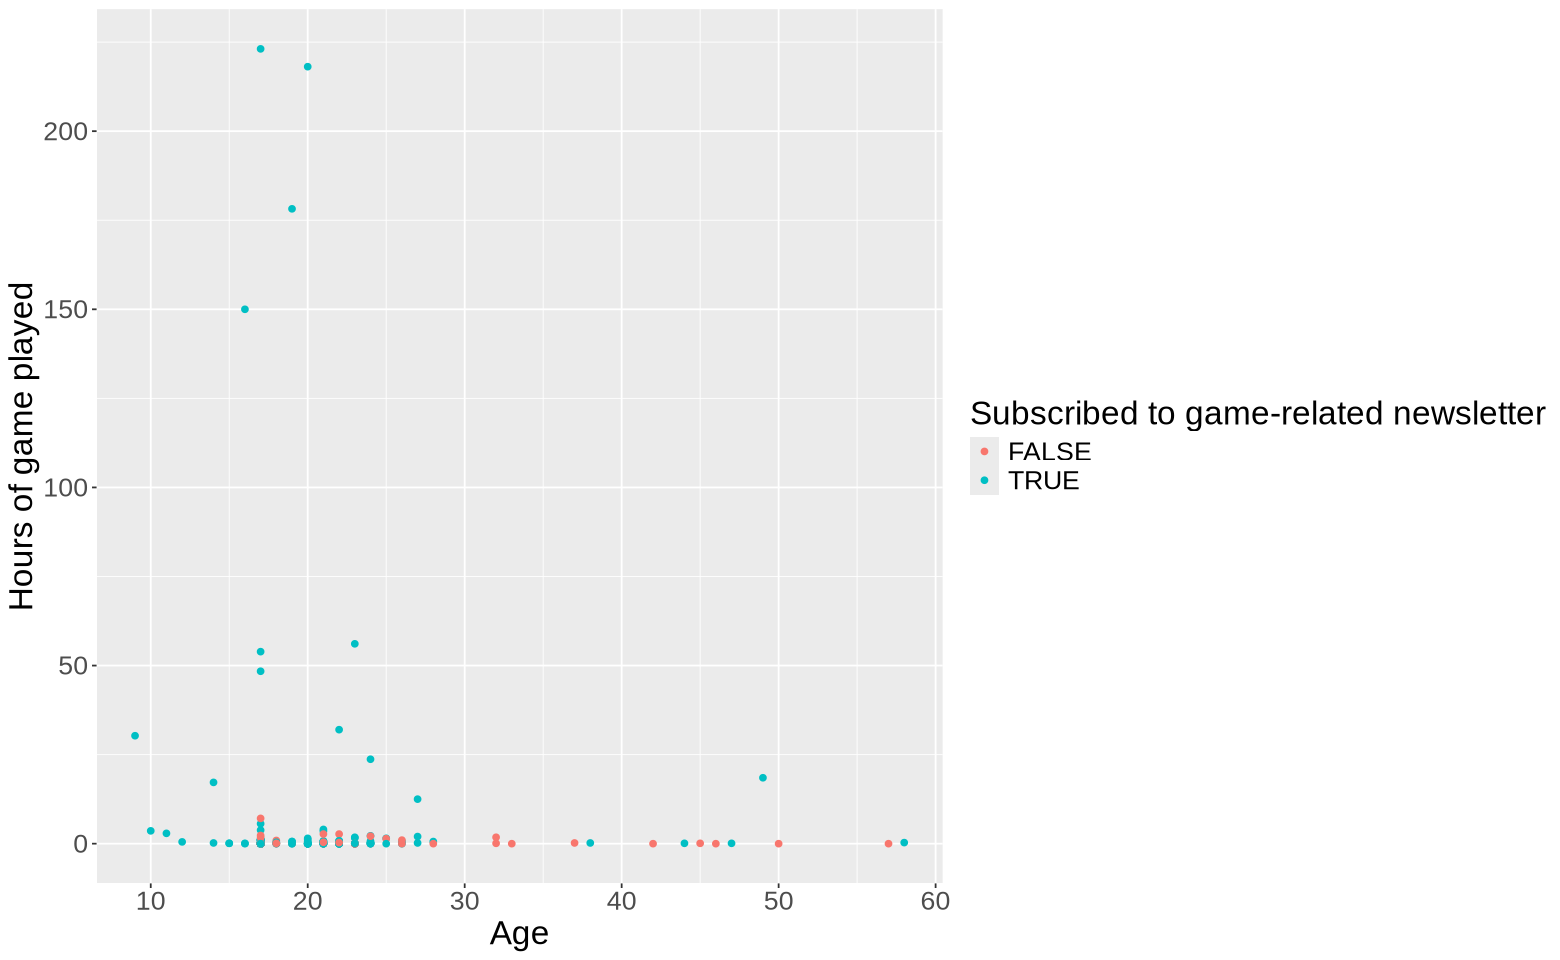

In [41]:
#plot 1

options(repr.plot.width = 13, repr.plot.height = 8)
subscription_plot <- ggplot(players, aes(x=Age, y=played_hours, color=subscribe)) +
       geom_point() +
       labs(title = "Hours of game played vs Age" x="Age", y="Hours of game played", color = "Subscribed to game-related newsletter") +
    theme(text=element_text(size= 20))
subscription_plot

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


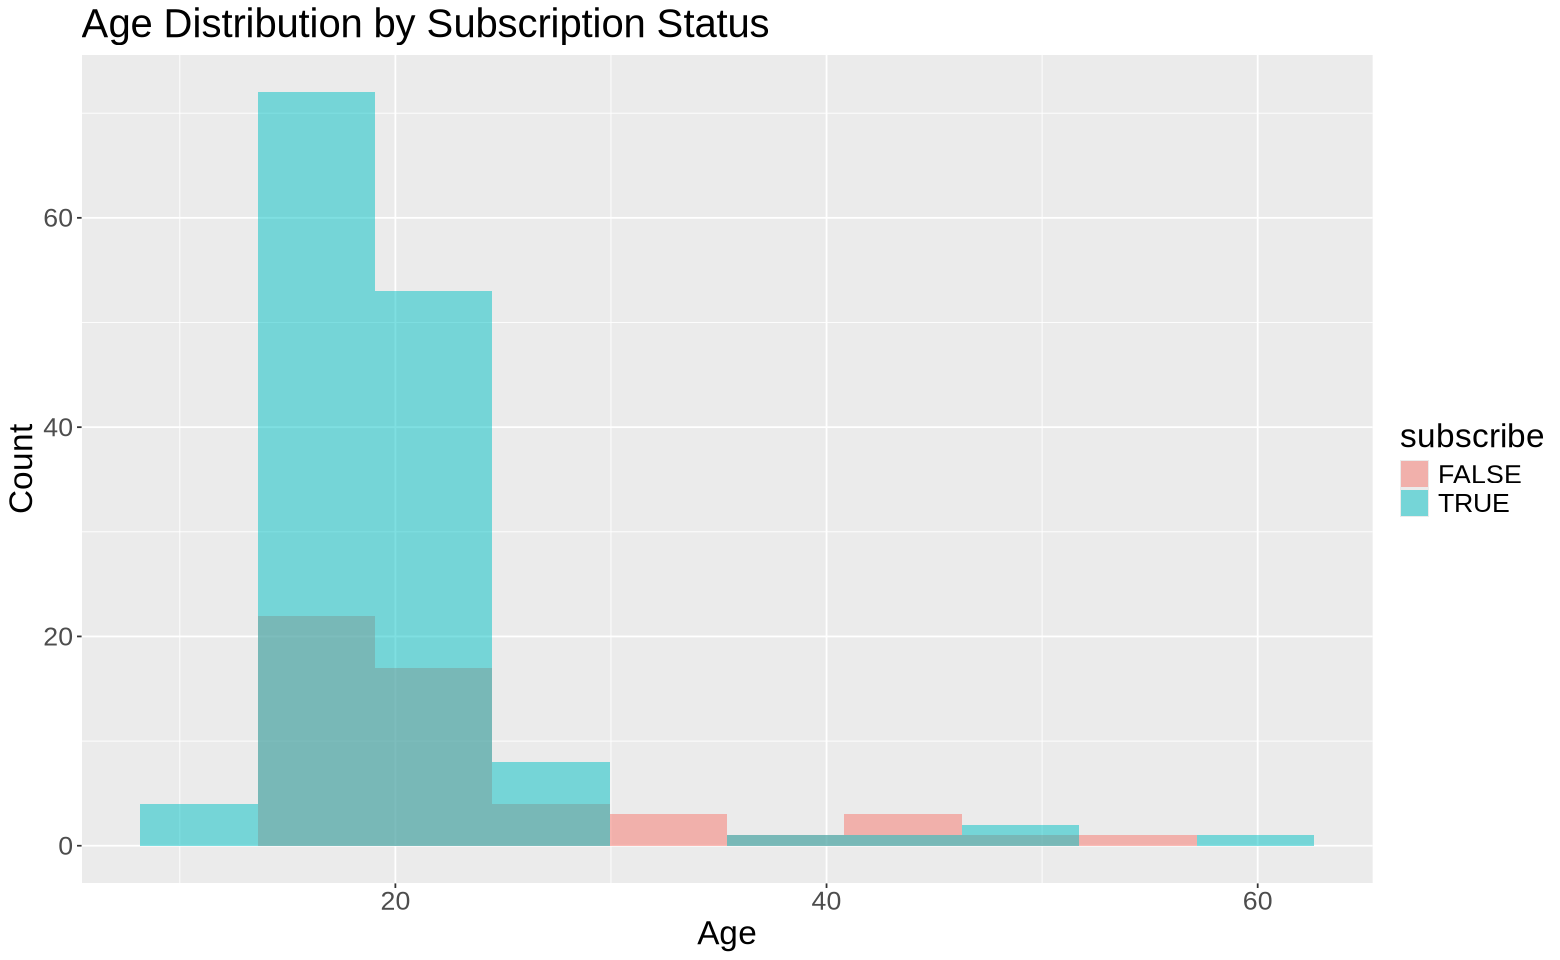

In [43]:
ggplot(players, aes(x = Age, fill = subscribe)) +
    geom_histogram(position = "identity", alpha = 0.5, bins = 10) +
    labs(title = "Age Distribution by Subscription Status", x= "Age", y = "Count") +
    theme(text=element_text(size= 20))

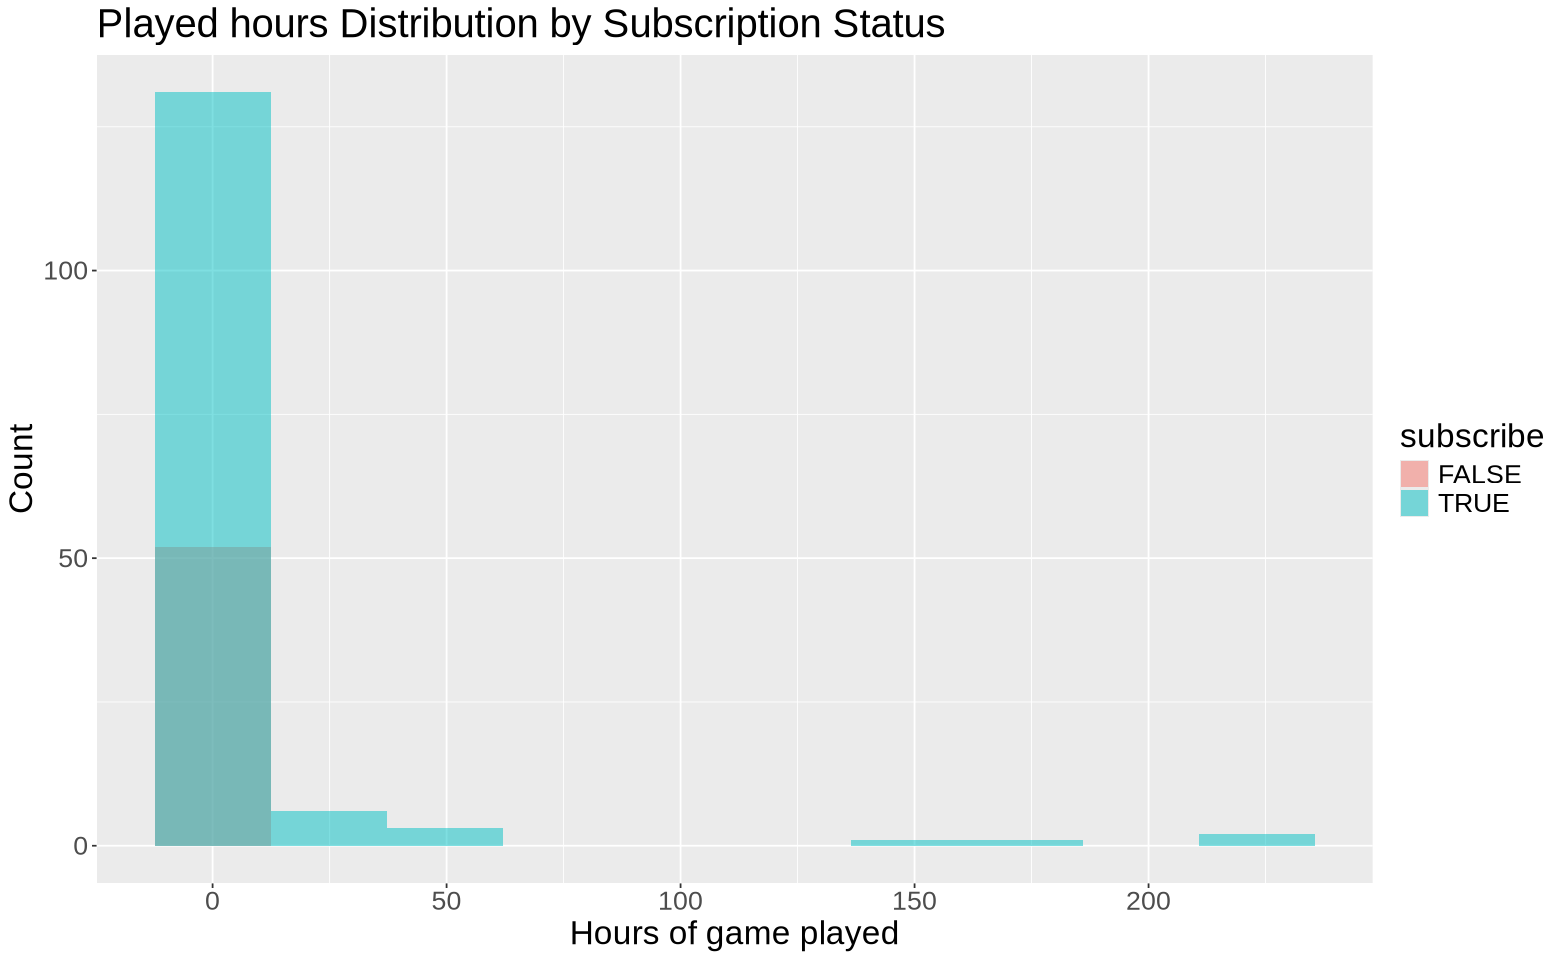

In [44]:
ggplot(players, aes(x = played_hours, fill = subscribe)) +
    geom_histogram(position = "identity", alpha = 0.5, bins = 10) +
    labs(title = "Played hours Distribution by Subscription Status", x= "Hours of game played", y = "Count") +
    theme(text=element_text(size= 20))